In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#import tensorflow as tf
#from tensorflow import keras
import traceback
import re
from pandas import Series
import numpy as np

In [2]:
spray ='C:\\Users\\Nader\\Desktop\\Final Capstone\\West Nile\\spray.csv\\spray.csv'
spray = pd.read_csv(spray)
spray

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [3]:
weather = 'C:\\Users\\Nader\\Desktop\\Final Capstone\\West Nile\\weather.csv\\weather.csv'
weather = pd.read_csv(weather)
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [4]:
sample = 'C:\\Users\\Nader\\Desktop\\Final Capstone\\West Nile\\sampleSubmission.csv\\sampleSubmission.csv'
sample = pd.read_csv(sample)
sample

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
116288,116289,0
116289,116290,0
116290,116291,0
116291,116292,0


In [5]:
train ='C:\\Users\\Nader\\Desktop\\Final Capstone\\West Nile\\train.csv\\train.csv'
train = pd.read_csv(train)
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [6]:
test ='C:\\Users\\Nader\\Desktop\\Final Capstone\\West Nile\\test.csv\\test.csv'
test = pd.read_csv(test)
test

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX SALINARIUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116289,116290,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TERRITANS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116290,116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TARSALIS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116291,116292,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8


# Data Wrangling and EDA

In [7]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [9]:
train['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [10]:
train['WnvPresent'].value_counts()/len(train['WnvPresent'])

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

<AxesSubplot:xlabel='WnvPresent', ylabel='count'>

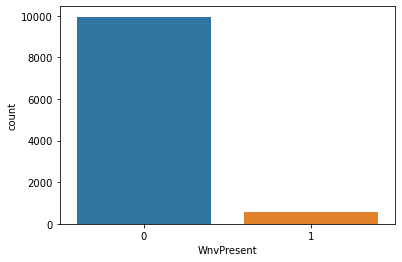

In [11]:
plt.subplot(1,1,1)
sns.countplot(x=train.WnvPresent)

In [12]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [13]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [14]:
weather = weather.replace('M', -1)
# -1 Indicates Misisng Data
weather = weather.drop(labels=['Depart','CodeSum','Depth','Water1','SnowFall'], axis=1) 

In [15]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [16]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

# Distance of Weather Station to Trap

In [17]:
LatitudeW = []
LongitudeW = []
for i in weather['Station']:
    if i == 1.0:
        LatitudeW.append(41.995)
        LongitudeW.append(-87.933)
    else:
        LatitudeW.append(41.786)
        LongitudeW.append(-87.752 )

In [18]:
weather['LatitudeW'] = LatitudeW
weather['LongitudeW'] = LongitudeW
train['Date'].value_counts()

2007-08-01    551
2007-08-15    276
2007-08-24    186
2007-08-21    186
2013-08-01    186
             ... 
2007-08-09     26
2007-05-29     25
2007-09-25     23
2009-06-03     14
2007-08-03      5
Name: Date, Length: 95, dtype: int64

In [19]:
weather.shape

(2944, 19)

In [20]:
result = train.merge(weather, on ='Date')
result['LatDif'] = abs(result['Latitude'] - result['LatitudeW'])
result['LonDif'] = abs(result['Longitude'] - result['LongitudeW'])
result['CoorAvg'] = (result['LatDif'] + result['LonDif'])/2
result = result.sort_values(by = 'CoorAvg')
result = result.drop_duplicates(['Date', 'Address', 'Trap', 'Latitude', 'Longitude'], keep='first')

In [21]:
duplicate = result[result.duplicated(['Date', 'Latitude', 'Longitude', 'Trap'])]
duplicate

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,LatitudeW,LongitudeW,LatDif,LonDif,CoorAvg


In [22]:
sample.isnull().sum()

Id            0
WnvPresent    0
dtype: int64

In [23]:
weather.shape

(2944, 19)

In [24]:
sample.shape

(116293, 2)

In [25]:
train.shape

(10506, 12)

In [26]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [27]:
spray = spray.drop(columns = 'Time')

In [28]:
spray.isnull().sum()

Date         0
Latitude     0
Longitude    0
dtype: int64

In [29]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [30]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   DewPoint     2944 non-null   int64  
 6   WetBulb      2944 non-null   object 
 7   Heat         2944 non-null   object 
 8   Cool         2944 non-null   object 
 9   Sunrise      2944 non-null   object 
 10  Sunset       2944 non-null   object 
 11  PrecipTotal  2944 non-null   object 
 12  StnPressure  2944 non-null   object 
 13  SeaLevel     2944 non-null   object 
 14  ResultSpeed  2944 non-null   float64
 15  ResultDir    2944 non-null   int64  
 16  AvgSpeed     2944 non-null   object 
 17  LatitudeW    2944 non-null   float64
 18  LongitudeW   2944 non-null   float64
dtypes: flo

In [32]:
for i in weather.columns: #iterate through each column
    if i not in ['Date']: #ignore these columns for now (want to convert the rest to floats)
        weather[i].replace('-', 0, inplace=True) #'-' is 0
        weather[i].replace('  T', 0.005, inplace=True) #'T' is trace 
        weather[i] = weather[i].astype('float') #covert to float

In [33]:
weather['Date'] = pd.to_datetime(weather['Date'])
train['Date'] = pd.to_datetime(train['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])
result['Date'] = pd.to_datetime(result['Date'])

In [34]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   float64       
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   float64       
 3   Tmin         2944 non-null   float64       
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   float64       
 6   WetBulb      2944 non-null   float64       
 7   Heat         2944 non-null   float64       
 8   Cool         2944 non-null   float64       
 9   Sunrise      2944 non-null   float64       
 10  Sunset       2944 non-null   float64       
 11  PrecipTotal  2944 non-null   float64       
 12  StnPressure  2944 non-null   float64       
 13  SeaLevel     2944 non-null   float64       
 14  ResultSpeed  2944 non-null   float64       
 15  ResultDir    2944 non-null   float64       
 16  AvgSpe

In [35]:
spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [36]:
result['Weekday'] = result['Date'].dt.dayofweek

In [37]:
#result['Weekday'] = result['Weekday'].map({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})

In [38]:
result['Month'] = result['Date'].dt.month
#result['Month'] = result['Month'].map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

In [39]:
result['Month'].value_counts()

8     1363
9     1143
7     1093
6      816
10     142
5       59
Name: Month, dtype: int64

In [40]:
MonthCount = result.Month.value_counts()
MonthWithWNV = result.groupby('Month')['WnvPresent'].sum().sort_values(ascending=False)
MonthCount=MonthCount.to_frame().join(MonthWithWNV.to_frame())
MonthCount = MonthCount.rename(columns = {'Month' : 'Total_Count', 'WnvPresent' : 'Wnv_Count'})
MonthCount['Wnv_Percent'] = MonthCount.Wnv_Count*100/MonthCount.Total_Count
MonthCount

,Total_Count,Wnv_Count,Wnv_Percent
8,1363,131,9.611152
9,1143,51,4.461942
7,1093,16,1.463861
6,816,1,0.122549
10,142,0,0.000000
5,59,0,0.000000


C:\Users\Nader\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<AxesSubplot:xlabel='Month', ylabel='NumMosquitos'>,
 <AxesSubplot:xlabel='Month', ylabel='NumMosquitos'>)

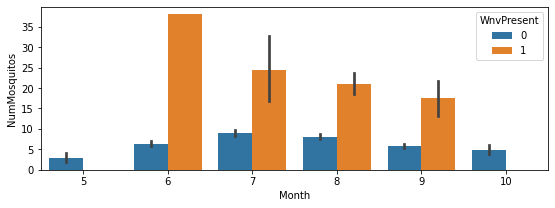

In [41]:
plt.subplots(figsize=(20,3))
plt.subplot(1,2,1),sns.barplot('Month','NumMosquitos',data=result,hue='WnvPresent')

In [42]:
result = result.sort_values(by = 'Date')

In [43]:
result['PrecipTotal']

35       0.00
13       0.00
25       0.00
33       0.00
19       0.00
         ... 
21004    0.00
20919    0.00
21001    0.00
20923    0.00
20848    0.00
Name: PrecipTotal, Length: 4616, dtype: object

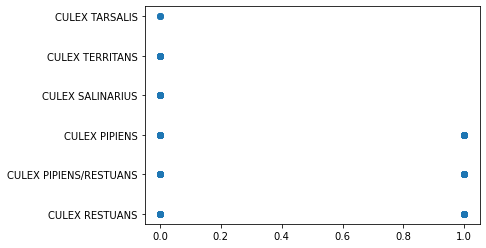

In [44]:
plt.scatter(result['WnvPresent'], (result['Species']))

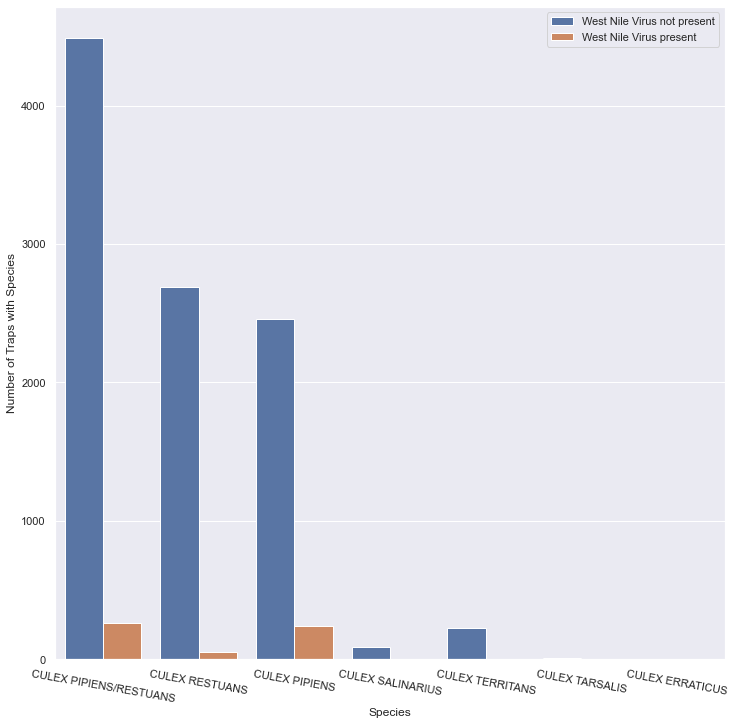

In [45]:
sns.set(font_scale=1)
plt.figure(figsize=(12,12))
sns.countplot(x='Species', hue='WnvPresent', data=train)
plt.xticks(rotation=-10)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.show()

In [46]:
result.shape

(4616, 35)

In [47]:
#features2 = [i for i in result.columns if i not in ['LatDif', 'LonDif', 'CoorAvg', 'Weekday', 'LongitudeW', 'LatitudeW', 'Latitude', 'Longitude']]

In [49]:
#plt.scatter(features2, result.WnvPresent)

In [50]:
result['TMaxShift'] = result['Tmax'].shift(1)
result['TMinShift'] = result['Tmin'].shift(1)

In [51]:
result

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,AvgSpeed,LatitudeW,LongitudeW,LatDif,LonDif,CoorAvg,Weekday,Month,TMaxShift,TMinShift
35,2007-05-29,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,...,7.4,41.786,-87.752,0.054078,0.074488,0.064283,1,5,NaN,NaN
13,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,7.4,41.786,-87.752,0.105118,0.097509,0.101313,1,5,88.0,65.0
25,2007-05-29,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,...,7.4,41.786,-87.752,0.135965,0.119915,0.127940,1,5,88.0,65.0
33,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,...,7.4,41.786,-87.752,0.065152,0.085986,0.075569,1,5,88.0,65.0
19,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,7.4,41.786,-87.752,0.110282,0.096768,0.103525,1,5,88.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21004,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,...,4.2,41.995,-87.933,0.007720,0.266934,0.137327,3,9,75.0,55.0
20919,2013-09-26,"7900 South South Chicago Avenue, Chicago, IL 6...",CULEX PIPIENS/RESTUANS,79,S CHICAGO AVE,T083,"7900 S CHICAGO AVE, Chicago, IL",41.754292,-87.590773,9,...,4.6,41.786,-87.752,0.031708,0.161227,0.096467,3,9,75.0,50.0
21001,2013-09-26,"3900 North Springfield Avenue, Chicago, IL 606...",CULEX PIPIENS/RESTUANS,39,N SPRINGFIELD AVE,T228,"3900 N SPRINGFIELD AVE, Chicago, IL",41.951866,-87.725057,8,...,4.6,41.786,-87.752,0.165866,0.026943,0.096404,3,9,75.0,55.0
20923,2013-09-26,"5200 South Kolmar Avenue, Chicago, IL 60632, USA",CULEX PIPIENS,52,S KOLMAR,T114,"5200 S KOLMAR, Chicago, IL",41.798697,-87.736812,8,...,4.6,41.786,-87.752,0.012697,0.015188,0.013942,3,9,75.0,55.0


In [52]:
result['PrecipTotal'].replace('  T', 0.0, inplace=True)
result['PrecipTotal']

35       0.00
13       0.00
25       0.00
33       0.00
19       0.00
         ... 
21004    0.00
20919    0.00
21001    0.00
20923    0.00
20848    0.00
Name: PrecipTotal, Length: 4616, dtype: object

In [53]:
result['PrecipTotal'] = pd.to_numeric(result['PrecipTotal'])

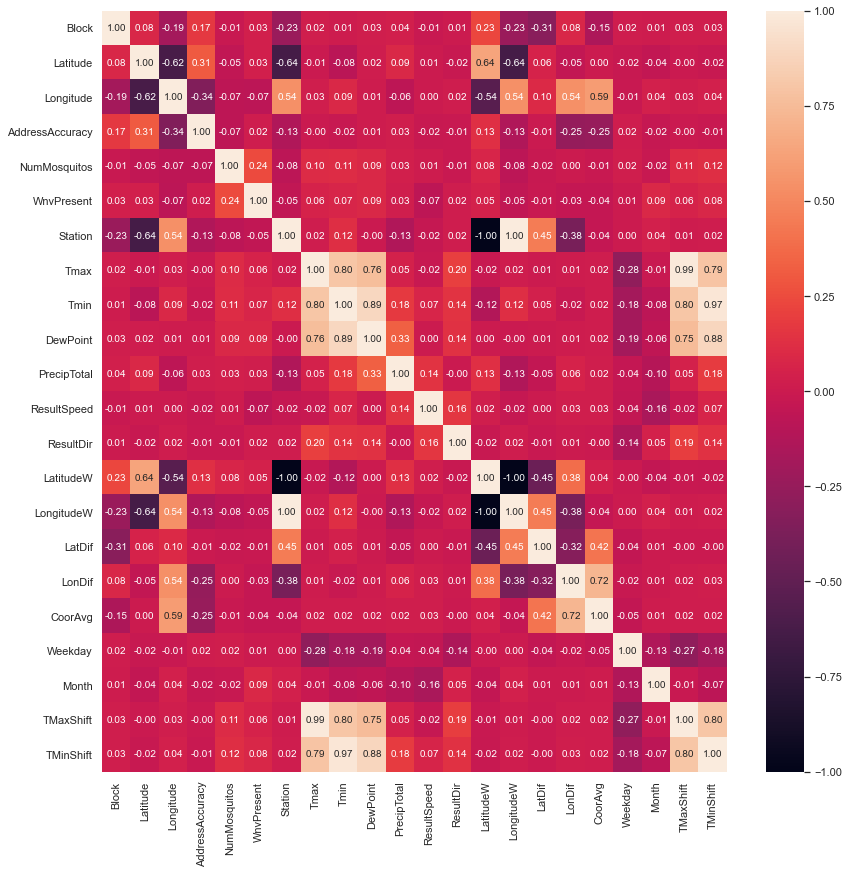

In [54]:
plt.subplots(figsize=(14,14))

corr = result.corr(method='pearson')
#sns.heatmap(dfweather_station[weather_features].corr());
ax = sns.heatmap(corr, annot=True,annot_kws={'size':10}, fmt=".2f")
plt.savefig('heatmap.png',dpi=600)

In [55]:
columns_to_drop=['Date','Address', 'Street','Trap','Sunrise','Sunset','AddressNumberAndStreet', 'Tmax', 'Tmin', 'AvgSpeed', 'SeaLevel', 'StnPressure']
result['Tavg'] = pd.to_numeric(result['Tavg'])

In [56]:
result=result.drop(columns=columns_to_drop)

In [57]:
result['Tavg'] = result['Tavg'].astype('str').astype('int')
result['Heat'] = result['Heat'].astype('str').astype('int')
result['Cool'] = result['Cool'].astype('str').astype('int')
result['WetBulb'] = result['WetBulb'].astype('str').astype('int')

In [58]:
result.to_csv(r'C:\Users\Nader\Desktop\Coding Stuff\CleanedWNV.csv', index = False)

In [59]:
from sklearn.preprocessing import OneHotEncoder
df_encoded =pd.get_dummies(result, columns=['Species','Month'])

In [60]:
columns_to_drop=['Species_CULEX TERRITANS','Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS','Species_CULEX RESTUANS','Month_6' ]
df_encoded=df_encoded.drop(columns=columns_to_drop)
df_encoded.columns

Index(['Block', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'WnvPresent', 'Station', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'ResultSpeed', 'ResultDir', 'LatitudeW', 'LongitudeW',
       'LatDif', 'LonDif', 'CoorAvg', 'Weekday', 'TMaxShift', 'TMinShift',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Month_5',
       'Month_7', 'Month_8', 'Month_9', 'Month_10'],
      dtype='object')

In [61]:
df_encoded=df_encoded.dropna()

# Pre-Processing and Training Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns='WnvPresent'), 
                                                    df_encoded.WnvPresent, test_size=0.3, 
                                                    random_state=47)

In [63]:
y_train.value_counts()

0    3092
1     138
Name: WnvPresent, dtype: int64

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 10429 to 9661
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Block                           3230 non-null   int64  
 1   Latitude                        3230 non-null   float64
 2   Longitude                       3230 non-null   float64
 3   AddressAccuracy                 3230 non-null   int64  
 4   NumMosquitos                    3230 non-null   int64  
 5   Station                         3230 non-null   int64  
 6   Tavg                            3230 non-null   int32  
 7   DewPoint                        3230 non-null   int64  
 8   WetBulb                         3230 non-null   int32  
 9   Heat                            3230 non-null   int32  
 10  Cool                            3230 non-null   int32  
 11  PrecipTotal                     3230 non-null   float64
 12  ResultSpeed                   

# Information Value (IV) Technique

In [65]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 10429 to 9661
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Block                           3230 non-null   int64  
 1   Latitude                        3230 non-null   float64
 2   Longitude                       3230 non-null   float64
 3   AddressAccuracy                 3230 non-null   int64  
 4   NumMosquitos                    3230 non-null   int64  
 5   Station                         3230 non-null   int64  
 6   Tavg                            3230 non-null   int32  
 7   DewPoint                        3230 non-null   int64  
 8   WetBulb                         3230 non-null   int32  
 9   Heat                            3230 non-null   int32  
 10  Cool                            3230 non-null   int32  
 11  PrecipTotal                     3230 non-null   float64
 12  ResultSpeed                   

In [67]:
final_iv,IV = data_vars(X_train, y_train)

C:\Users\Nader\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
#display(X2.shape)
#X2.head()

In [69]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max() > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max()
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor')

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)


Iteration # 1
Removing CoorAvg with VIF of inf
Iteration # 2
Removing LatitudeW with VIF of inf
Iteration # 3
Removing LongitudeW with VIF of 31787257.678839
Iteration # 4


C:\Users\Nader\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Nader\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing Longitude with VIF of 446412.623332
Iteration # 5
Removing WetBulb with VIF of 521.819015
Iteration # 6
Removing TMinShift with VIF of 400.416106
Iteration # 7
Removing Latitude with VIF of 168.688672
Iteration # 8
Removing DewPoint with VIF of 39.667907
Iteration # 9
Removing Station with VIF of 15.135946
Iteration # 10
Complete


In [70]:
X_train=final_df
#display(len(X_train.columns))
#display(X_train.columns)
#X_train.head()
final_vif

,VIFactor,features
6,1.196342,PrecipTotal
1,1.297795,Heat
4,1.763403,Month_7
9,1.764719,Species_CULEX PIPIENS
5,1.889066,Month_8
2,2.605701,LatDif
10,2.728332,Species_CULEX PIPIENS/RESTUANS
3,2.966102,LonDif
0,3.457115,Block
11,3.961475,Weekday


# DATA MODEL

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [72]:
X_test=X_test[X_train.columns]
X_test.head()

,Block,Heat,LatDif,LonDif,Month_7,Month_8,PrecipTotal,ResultDir,ResultSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Weekday
16319,89,4,0.052357,0.196490,0,0,0.00,2,8.8,0,0,4
18465,45,0,0.177976,0.060190,0,1,0.00,29,6.2,1,0,3
5724,15,0,0.000531,0.265264,0,0,0.00,22,2.8,0,1,1
5061,11,0,0.081108,0.097776,0,1,0.20,25,5.5,1,0,4
935,50,0,0.015498,0.011416,1,0,0.92,24,10.3,0,1,2


In [73]:
RF = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth=50, class_weight=dict({1:48, 0:1}), verbose=2)

In [74]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

y_pred_prob = RF.predict_proba(X_test)[:,1]

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [75]:
roc_value = roc_auc_score(y_test, y_pred_prob)
roc_value

0.687955029468575

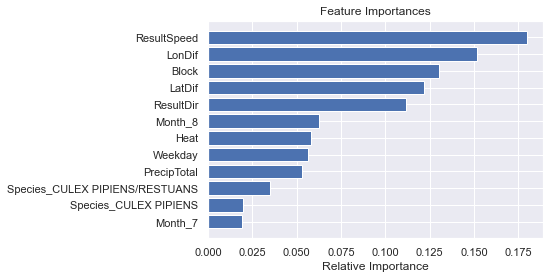

In [76]:
importances = RF.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBOOST

In [77]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score

eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(learning_rate = 0.001, n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',seed = 42,nthread=4,silent = True)
model.fit(X_train, y_train, eval_set=eval_set ,eval_metric="auc", verbose=True, early_stopping_rounds=50)

[11:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.67566	validation_1-auc:0.72130
[1]	validation_0-auc:0.70564	validation_1-auc:0.72552
[2]	validation_0-auc:0.70564	validation_1-auc:0.72552
[3]	validation_0-auc:0.71557	validation_1-auc:0.73100
[4]	validation_0-auc:0.71557	validation_1-auc:0.73100
[5]	validation_0-auc:0.72270	validation_1-auc:0.73780
[6]	validation_0-auc:0.72432	validation_1-auc:0.74786
[7]	validation_0-auc:0.72654	validation_1-auc:0.74471
[8]	validation_0-auc:0.73488	validation_1-auc:0.74561
[9]	validation_0-auc:0.76284	validation_1-auc:0.75482
[10]	validation_0-auc:0.76284	validation_1-auc:0.75482
[11]	validation_0-a

C:\Users\Nader\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[76]	validation_0-auc:0.79650	validation_1-auc:0.78798
[77]	validation_0-auc:0.79672	validation_1-auc:0.78726
[78]	validation_0-auc:0.79672	validation_1-auc:0.78726
[79]	validation_0-auc:0.79665	validation_1-auc:0.78732
[80]	validation_0-auc:0.79659	validation_1-auc:0.78727
[81]	validation_0-auc:0.79652	validation_1-auc:0.78723
[82]	validation_0-auc:0.79634	validation_1-auc:0.78749
[83]	validation_0-auc:0.80204	validation_1-auc:0.78541
[84]	validation_0-auc:0.80247	validation_1-auc:0.78539
[85]	validation_0-auc:0.80247	validation_1-auc:0.78539
[86]	validation_0-auc:0.80263	validation_1-auc:0.78511
[87]	validation_0-auc:0.80296	validation_1-auc:0.78528
[88]	validation_0-auc:0.80151	validation_1-auc:0.78500
[89]	validation_0-auc:0.80140	validation_1-auc:0.78531
[90]	validation_0-auc:0.80140	validation_1-auc:0.78531
[91]	validation_0-auc:0.80118	validation_1-auc:0.78518
[92]	validation_0-auc:0.80897	validation_1-auc:0.79397
[93]	validation_0-auc:0.80903	validation_1-auc:0.79405
[94]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [78]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [79]:
XGBpred = model.predict(X_test)
predictions = [round(value) for value in XGBpred]

C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [80]:
accuracy = accuracy_score(y_test, XGBpred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.60%


In [81]:
roc3 = roc_auc_score(y_test, XGBpred)
roc3

0.5

# FEATURE IMPORTANCE

In [82]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [83]:
def select_features(X_train, y_train, X_test):

	fs = SelectKBest(score_func=f_regression, k='all')

	fs.fit(X_train, y_train)

	X_train_fs = fs.transform(X_train)

	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3.676842
Feature 1: 16.010381
Feature 2: 0.466306
Feature 3: 3.839247
Feature 4: 15.608868
Feature 5: 80.446718
Feature 6: 1.759460
Feature 7: 4.330552
Feature 8: 15.450695
Feature 9: 16.784105
Feature 10: 2.235387
Feature 11: 0.757307


In [84]:
print(features)

Index(['Block', 'Heat', 'LatDif', 'LonDif', 'Month_7', 'Month_8',
       'PrecipTotal', 'ResultDir', 'ResultSpeed', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Weekday'],
      dtype='object')


# SHAP ANALYSIS

In [85]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


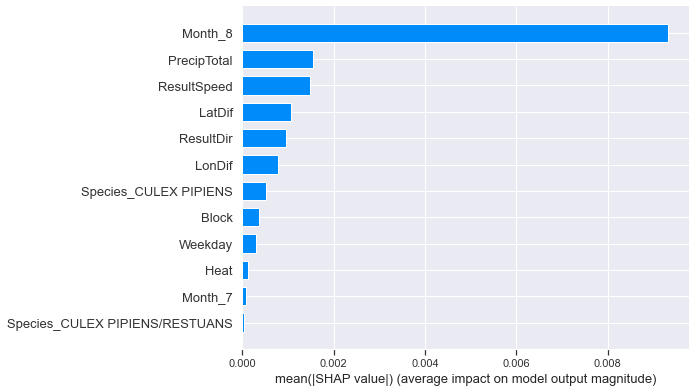

In [86]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
#shap_values = shap.TreeExplainer(y_pred).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')
# Month 8 is August which seems to have the most impact on a positive diagnosis of WNV

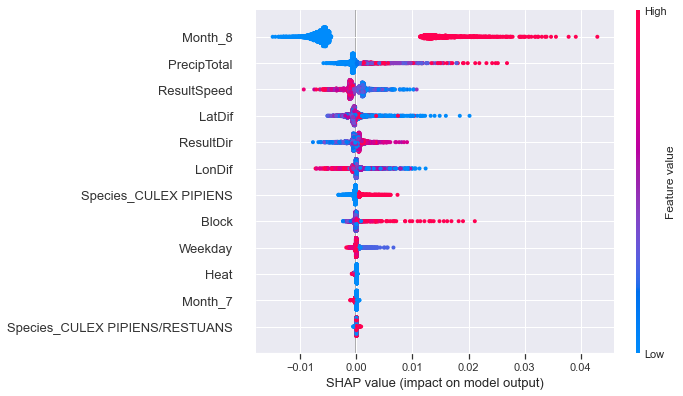

In [87]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

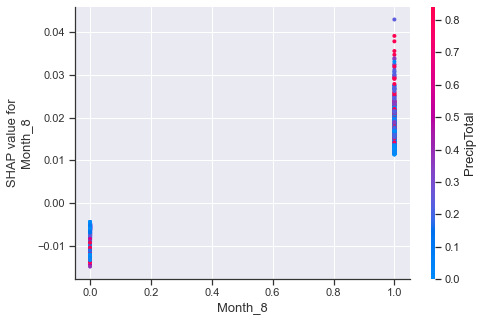

In [88]:
shap.dependence_plot('Month_8', shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


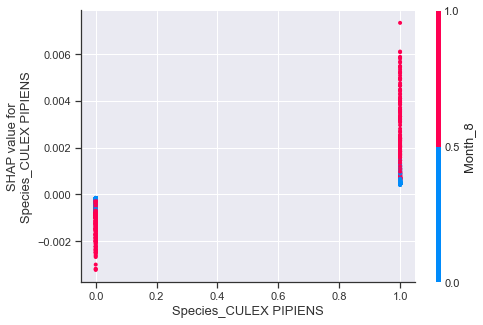

In [89]:
shap.dependence_plot('Species_CULEX PIPIENS', shap_values, X_train)

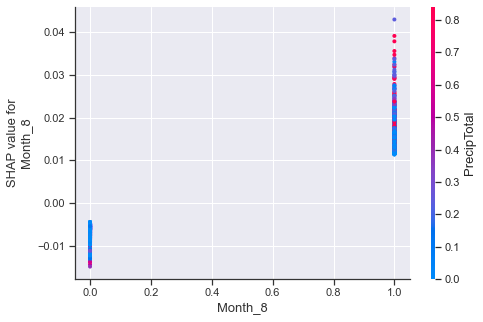

In [90]:
shap.dependence_plot('Month_8', shap_values, X_train)